In [36]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [37]:
N = 51
xs, xe = -1.0, 2.0
ys, ye = -0.5, 0.5
x = numpy.linspace(xs, xe, N)
y = numpy.linspace(ys, ye, N)
X, Y = numpy.meshgrid(x, y)


In [62]:
x=numpy.loadtxt('mae6226/AeroPython/lessons/resources/NACA0012_x.txt')
y=numpy.loadtxt('mae6226/AeroPython/lessons/resources/NACA0012_y.txt')
sigma=numpy.loadtxt('mae6226/AeroPython/lessons/resources/NACA0012_sigma.txt')
print(x,y)

[  9.99506682e-01   9.97535357e-01   9.93600488e-01   9.87717603e-01
   9.79909919e-01   9.70208251e-01   9.58650885e-01   9.45283433e-01
   9.30158651e-01   9.13336230e-01   8.94882559e-01   8.74870468e-01
   8.53378933e-01   8.30492774e-01   8.06302311e-01   7.80903012e-01
   7.54395117e-01   7.26883241e-01   6.98475961e-01   6.69285387e-01
   6.39426720e-01   6.09017800e-01   5.78178637e-01   5.47030938e-01
   5.15697630e-01   4.84302370e-01   4.52969062e-01   4.21821363e-01
   3.90982200e-01   3.60573280e-01   3.30714613e-01   3.01524039e-01
   2.73116759e-01   2.45604883e-01   2.19096988e-01   1.93697689e-01
   1.69507226e-01   1.46621067e-01   1.25129532e-01   1.05117441e-01
   8.66637700e-02   6.98413486e-02   5.47165669e-02   4.13491154e-02
   2.97917495e-02   2.00900806e-02   1.22823970e-02   6.39951199e-03
   2.46464256e-03   4.93317893e-04   4.93317893e-04   2.46464256e-03
   6.39951199e-03   1.22823970e-02   2.00900806e-02   2.97917495e-02
   4.13491154e-02   5.47165669e-02

In [72]:
x[99]

0.99950668210706795

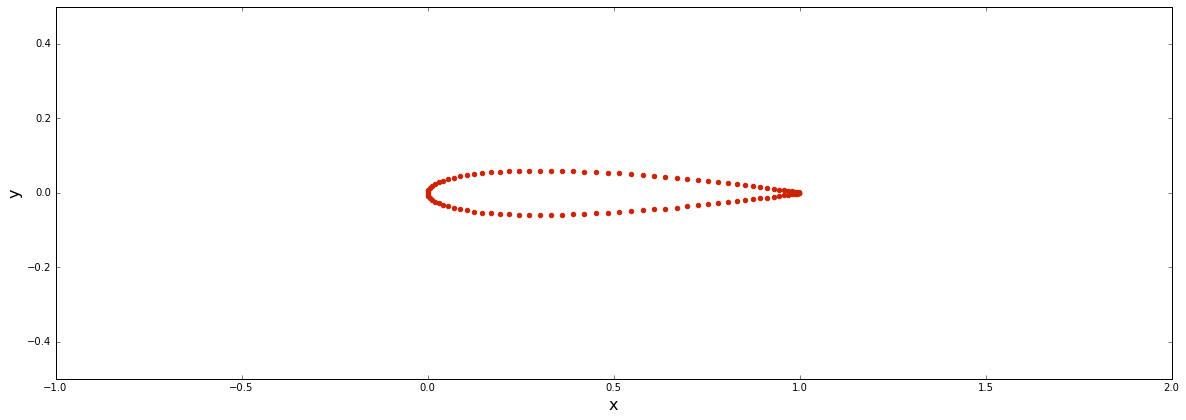

In [64]:
size = 20
pyplot.figure(figsize=(size,(ye-ys)/(xe-xs)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xs, xe)
pyplot.ylim(ys, ye)
pyplot.scatter(x, y, color='#CD2305')

In [65]:
u_inf =1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [87]:
def get_velocity(strength, xm, ym, X, Y):
    u = strength/(2*numpy.pi)*(X-xm)/((X-xm)**2+(Y-ym)**2)
    v = strength/(2*numpy.pi)*(Y-ym)/((X-xm)**2+(Y-ym)**2)
    return u, v

In [88]:
def get_stream_function(strength, xm, ym, X, Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ym), (X-xm))
    return psi

In [89]:
u_1,v_1,psi_1=0,0,0
for i in range(100):
    u_source, v_source = get_velocity(sigma[i], x[i], y[i], X, Y)
    psi_source = get_stream_function(sigma[i], x[i], y[i], X, Y)
    u_1=u_1+u_source
    v_1=v_1+v_source
    psi_1=psi_1+psi_source

NameError: name 'x_source' is not defined

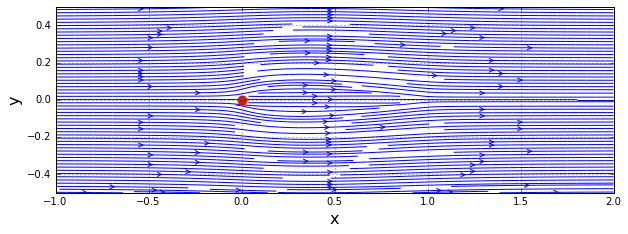

In [90]:
u = u_freestream + u_1
v = v_freestream + v_1
psi = psi_freestream + psi_1

size = 10
pyplot.figure(figsize=(size, (ye-ys)/(xe-xs)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xs, xe)
pyplot.ylim(ys, ye)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

x_stagnation = x_source - sigma/(2*numpy.pi*u_inf)
y_stagnation = y_source
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color= 'g', s=80, marker='o');


In [ ]:
cp = 1.0 - (u**2 + v**2) / u_inf**2
size = 10
pyplot.figure(figsize=(1.1*size, (ye-ys)/(xe-xs)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(xs, xe)
pyplot.ylim(ys, ye)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');